# MC886 - Projeto 2
Aluno: Mateus Feitosa Olivi  RA: 222059

# Parte 1:
    
<p style="text-align: justify;">
&emsp; O problema dessa primeira parte do projeto está relacionada a predição da posicão de uma bola que é chutada contra um gol, para executar essa tarefa foi dado dois datasets, kick1.dat e kick2.dat, esses datasets representam duas trajetórias diferentes para a bola. Conhecidas essas duas trajetórias terei que implementar os algoritmos da regressão linear e polinomial, para que eu possa aplicar sobre os dois datasets e descobrir, através de métricas de avaliação, qual é o modelo mais adequado para cada dataset.
</p>

### 1. Implementações

<p style="text-align: justify;">
&emsp; Para implementar as regressões linear e polinomial irei usar o método do gradiente descendente, esse método considera como hipótese $h_{\theta}(x)$ e se baseia em atualizar os pesos $\theta_i$ utilizando as derivadas da função custo, irei explicar melhor isso na explicação da implementacao de cada regressão.<br>
&emsp; Nesse tópico também irei implementar funções para cálculo do erro, para leitura de dados e plot dos gráficos.
<\p>

#### 1.1 Regressão Linear
<p style="text-align: justify;">
&emsp; Para aplicar a regressão linear irei considerar a hipótese como $h_{\theta}(x) = \theta_{0} + \theta_{1}x$. Sabe-se também que a função custo é definida por:
     $$J(\theta_{0},\theta_{1}) = \frac{1}{2m}\sum_{i=1}^{m}[h_{\theta}(x_i) - y_{i}]^2$$
&emsp; Como dito anteriormente, no gradiente descentende, a atualização dos valores de $\theta$ é dado utilizando as derivadas parciais da função custo, isso é:
    $$\theta_{i} := \theta_{i} - \alpha\frac{\partial}{\partial \theta_{i}}J(\theta_{0},\theta_{1})$$
&emsp; Fazendo as derivadas parciais temos que, para $\theta_{0}$ e $\theta_{1}$, as atualizações são dadas por:
    $$\theta_{0} := \theta_{0} - \alpha\frac{1}{m}\sum_{i=1}^{m}[h_{\theta}(x_i) - y_{i}]  \ \ \ 
    e \ \ \ \theta_{1} := \theta_{1} - \alpha\frac{1}{m}\sum_{i=1}^{m}[h_{\theta}(x_i) - y_{i}]x_{i}$$
&emsp; Note que $\alpha$ é a taxa de aprendizado. Agora sabendo como funciona o gradiente descendente para a regressão linear posso implementar o seguinte algoritmo:
</p>

In [1]:
import math

def gradienteDescendenteLinear(Theta, y, x, alpha):
    m = len(x)
    Derivada1, Derivada2 = 1, 1
    iteracoes = 0
    
    while(abs(Derivada1) > 0.0001 or abs(Derivada2) > 0.0001):
        Somatorio1, Somatorio2 = 0,0
                
        for i in range(m):
            hi = Theta[0] + Theta[1]*x[i]
            yi = y[i]
            
            temp = (hi - yi)
            
            Somatorio1 += temp*1
            Somatorio2 += temp*x[i]
        
        Derivada1 = Somatorio1/m
        Derivada2 = Somatorio2/m
        
        Theta[0] = Theta[0] - alpha*Derivada1
        Theta[1] = Theta[1] - alpha*Derivada2
               
        iteracoes += 1
        
        if(Theta[0] > 2**100 or Theta[1] > 2**100):
            return 'Diverge', iteracoes
        
    return Theta, iteracoes

<p style="text-align: justify;">
&emsp; Note que este algoritmo atualiza os valores de $\theta$ até que as derivadas parciais da função custo estejam suficientemente próximo a zero, isso pode ser feito porque se as derivadas da função custo estão próximas a zero, então o valor de $\theta$ já está suficientemente próximo a um valor de mínimo. Assim, no meu algoritmo considerei que se os valores das derivadas forem menor que $10^{-4}$, então o valor achado de $\theta$ já está bom.<br>
&emsp;Ainda vale notar que essa função retorna uma lista com os valores atualizados de $\theta$ e o número de iterações que o algoritmo fez para obter a resposta.
</p>

#### 1.2 Regressão Polinomial
<p style="text-align: justify;">
&emsp; Para aplicar a regressão polinomial irei considerar a hipótese como $h_{\theta}(x) = \theta_{0} + \theta_{1}x + \theta_{2}x^2$, justificarei o grau da hipótese mais a frente. A função custo ainda é a mesma, mas agora ela também está em função do $\theta_{2}$:
     $$J(\theta_{0},\theta_{1},\theta_{2}) = \frac{1}{2m}\sum_{i=1}^{m}[h_{\theta}(x_i) - y_{i}]^2$$
&emsp; Da mesma forma que foi feito para regressão linear, os valores de $\theta$ são atualizados derivando a função custo:
    $$\theta_{i} := \theta_{i} - \alpha\frac{\partial}{\partial \theta_{i}}J(\theta_{0},\theta_{1},\theta_{2})$$
&emsp; Fazendo as derivadas parciais temos que, para $\theta_{0}$, $\theta_{1}$ e $\theta_{2}$, as atualizações são dadas por:
    $$\theta_{0} := \theta_{0} - \alpha\frac{2}{m}\sum_{i=1}^{m}[h_{\theta}(x_i) - y_{i}]  \ \ \ 
    , \ \ \ \theta_{1} := \theta_{1} - \alpha\frac{2}{m}\sum_{i=1}^{m}[h_{\theta}(x_i) - y_{i}]x_{i} \ \ \
    e \ \ \ \theta_{2} := \theta_{2} - \alpha\frac{2}{m}\sum_{i=1}^{m}[h_{\theta}(x_i) - y_{i}]x_{i}^2$$
&emsp; Lembre-se que $\alpha$ é a taxa de aprendizado. Agora sabendo como funciona o gradiente descendente para a regressão polinomial posso implementar o seguinte algoritmo:
</p>

In [2]:
def gradienteDescendentePolinomial(Theta, y, x, alpha):
    m = len(x)
    iteracoes = 0
    Derivada1,Derivada2,Derivada3 = 1,1,1
    
    while(abs(Derivada1) > 0.0001 or abs(Derivada2) > 0.0001 or abs(Derivada3) > 0.0001):
        Somatorio1, Somatorio2, Somatorio3 = 0,0,0
        
        for i in range(m):
            hi = Theta[0] + Theta[1]*x[i] + Theta[2]*(x[i])**2
            yi = y[i]
            
            temp = (hi - yi)
            
            Somatorio1 += temp*1
            Somatorio2 += temp*x[i]
            Somatorio3 += temp*(x[i])**2
        
        Derivada1 = 2*Somatorio1/m
        Derivada2 = 2*Somatorio2/m
        Derivada3 = 2*Somatorio3/m
        
        Theta[0] = Theta[0] - alpha*Derivada1
        Theta[1] = Theta[1] - alpha*Derivada2
        Theta[2] = Theta[2] - alpha*Derivada3
        
        iteracoes += 1
        
        if(Theta[0] > 2**100 or Theta[1] > 2**100 or Theta[2] > 2**100):
            return 'Diverge', iteracoes
                
    return Theta, iteracoes

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


<p style="text-align: justify;">
&emsp; Neste algoritmo, usei o mesmo critério de parada que apliquei na regressão linear, isso é, os valores de $\theta$ serão atualizados até que as derivadas parciais da função custo estejam suficientemente próximo a zero, no meu caso menor que $10^{-4}$.<br>
&emsp;Ainda vale relembrar que, assim como apliquei para a regressão linear, essa função também retorna uma lista com os valores atualizados de $\theta$ e o número de iterações que o algoritmo fez para obter a resposta.
</p>

#### 1.3 Erros
<p style="text-align: justify;">
&emsp; Um outro importante tipo de algoritmo que preciso implementar é um algoritmo para avaliação das regressões, no meu caso irei implementar o MSE (Mean Squared Error), o MSE é dado por:
    $$ MSE = \frac{1}{n} \sum_{j=1}^n (\hat{y}_j - y_j)^2$$
&emsp; Assim, posso implementar o seguinte algoritmo para o MSE:
</p>

In [3]:
def MSE(yreal, ytreino):
    n = len(yreal)
    MSE = 0
    
    for i in range(n):
        MSE += (yreal[i] - ytreino[i])**2
    
    MSE = MSE/n
    
    return MSE

<p style="text-align: justify;">
&emsp; Mas note, o MSE requer os valores de y que foram obtidos a partir do treino, isso é, os valores de $y(x)$ que podem ser obtidos usando os coeficientes da regressão. Para isso posso fazer uma função, para obter o valor de $y(x)$ para regressão linear e para regressão polinomial de grau 2:
</p>

In [4]:
def f(Theta, X, grau):
    if(grau == 1):
        y = lambda x: Theta[0] + Theta[1]*x
    elif(grau == 2):
        y = lambda x: Theta[0] + Theta[1]*x + Theta[2]*x**2
    
    y_lista = []
    
    for i in range(len(X)):
        y_lista.append(y(X[i]))
    return y_lista

#### 1.4 Dados
<p style="text-align: justify;">
&emsp; Ainda me falta implementar uma função para fazer a leitura dos dados do dataset, essa é uma função bem simples, utilizarei nela a biblioteca pandas:
</p>

In [5]:
import pandas as pd
def Dados(caminho):
    X = pd.read_csv(caminho, sep = '\\s+', header = None)
    return X.values

#### 1.5 Plot
<p style="text-align: justify;">
&emsp; Agora vou implementar funções de plot para mostrar o resultado das regressões. Primeiro vou implementar duas funções para o plot de uma função linear e uma para o plot de uma polinomial de segundo grau. Além disso tenho duas funções auxiliares para fazer a legenda do gráfico, descrevendo a função:
</p>

In [6]:
import matplotlib.pyplot as plt

def legendaLinear(Theta, label):
    
    a = str(round(Theta[0],5))
    b = str(abs(round(Theta[1],5)))
    
    if(Theta[1] < 0):
        sinal = ' - '
    else:
        sinal = ' + '
    
    return label[0] + ' = ' + a + sinal +  b +'.' + label[1]

def legendaPolinomial(Theta, label):
    
    a = str(round(Theta[0],5))
    b = str(abs(round(Theta[1],5)))
    c = str(abs(round(Theta[2],5)))
    
    if(Theta[1] < 0):
        sinalb = ' - '
    else:
        sinalb = ' + '
    
    if(Theta[2] < 0):
        sinalc = ' - '
    else:
        sinalc = ' + '
    
    return label[0] + ' = ' + a + sinalb +  b +'.' + label[1] + sinalc +  c +'.' + label[1]+ '²' 

def plotLinear(Theta, y, x, label):
    plt.scatter(x, y, s=75, color='r', edgecolor='k')
    plt.title("Gráfico de "+label[0])
    plt.plot(x, Theta[0] + Theta[1]*x)

    plt.legend([legendaLinear(Theta, label)], fontsize=13)
    
    plt.xlabel(label[1], fontsize=15)
    plt.ylabel(label[0], fontsize=15)
    
    plt.show()

def plotPolinomial(Theta, y, x, label):
    plt.scatter(x, y, s=75, color='r', edgecolor='k')
    plt.title("Gráfico de "+label[0])
    plt.plot(x, Theta[0] + Theta[1]*x + Theta[2]*x*x)
    
    plt.legend([legendaPolinomial(Theta, label)], fontsize=12)
    
    plt.xlabel(label[1], fontsize=15)
    plt.ylabel(label[0], fontsize=15)
    
    plt.show()

<p style="text-align: justify;">
&emsp; Ainda vou implementar duas funções para fazer os plot das trajetória da bola usando as funções paramétricas, portanto irei passar como parâmetro os valores de $\theta$  de $x(t)$ e $y(t)$ e assim irei plotar a trajetória, note que o parâmetro pos será usado para perspectiva de visão do gráfico: 

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plotTrajetoria3DLinear(ThetaX, ThetaZ, Data, pos = 'cima'):
    fig = plt.figure(figsize=(9,9))
    ax = fig.gca(projection = '3d')

    t = np.linspace(0, 2.1, 100)
    x = ThetaX[0] + ThetaX[1]*t
    y = t
    z = ThetaZ[0] + ThetaZ[1]*t  


    ax.plot(x,y,z)
    ax.scatter3D(Data[:,0], Data[:,1], Data[:,2]);

    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10) 
    ax.set_zlabel('z', fontsize=10) 

    ax.set_zlim(0,1)
    ax.set_xlim(-3,3)
    ax.set_ylim(0,2.3)
    
    if(pos == 'cima'):
        ax.view_init(90, 270)
    elif(pos == 'lado'):
        ax.view_init(20, 0)
    plt.show()

def plotTrajetoria3DPolinomial(ThetaX, ThetaZ, Data, pos = 'cima'):
    fig = plt.figure(figsize=(9,9))
    ax = fig.gca(projection = '3d')

    t = np.linspace(0, 2.1, 100)
    x = ThetaX[0] + ThetaX[1]*t + ThetaX[2]*t**2
    y = t
    z = ThetaZ[0] + ThetaZ[1]*t + ThetaZ[2]*t**2


    ax.plot(x,y,z)
    ax.scatter3D(Data[:,0], Data[:,1], Data[:,2]);

    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10) 
    ax.set_zlabel('z', fontsize=10) 

    ax.set_zlim(0,1)
    ax.set_xlim(-3,3)
    ax.set_ylim(0,2.3)
    
    if(pos == 'cima'):
        ax.view_init(90, 270)
    elif(pos == 'lado'):
        ax.view_init(20, 0)
    plt.show()

<p style="text-align: justify;">
&emsp; Pronto, as minhas principais ferramentas para realizar a análise dos datasets estão prontas, e agora já posso fazer as análises e predições propostas nessa parte do projeto
</p>

### 2. Análise dos datasets
<p style="text-align: justify;">
&emsp; Antes de iniciar, vou explicar uma decisão minha, como visto anteriormente eu implementei uma regressão polinomial apenas para o segundo grau, o motivo para ter implementado apenas para grau 2 e não para graus maiores está relacionado a natureza do problema. O problema desse projeto está relacionado ao chute de uma bola, que é um lançamento obliquo, ou seja, descreverá uma trajetória parabólica. Mas então quer dizer que qualquer grau diferente de 2 está incorreto? Não, por exemplo, se tivermos um chute rasteiro ou um chute forte o suficiente para que possamos aproximar a porção inicial da trajetória a uma reta podemos fazer uma regressão de grau 1. Mas e os graus maiores? Se pegarmos um zoom de uma polinomial de grau maior que 2, talvez exista alguma aproximação boa para os pontos, porém não vai ser tão boa quanto as aproximações linear e de segundo grau, já que são os modelos permitidos para um chute de uma bola.<br>
    
&emsp; Nos datasets são dados os valores de $x,y,z$, se fizessemos uma regressão linear multivariada do tipo $y(x,z) = a + b \cdot x + c \cdot z$ obteriamos um plano, e como se sabe um plano não define uma trajetória, então o que irei fazer será a regressão linear para retas paramétricas da trajetória, para isso irei considerar:
                                        $$\left\{\begin{matrix}
                                        y(t) &=  &t \\ 
                                        x(t) &= &a &+ &b \cdot t\\ 
                                        z(t) &= &c &+ &d \cdot t
                                        \end{matrix}\right.
                                        $$
 
&emsp; Da mesma forma, se fizessemos uma regressão polinomial multivariada obteriamos uma superficie, e como se sabe uma superficie não define uma trajetória, então o que irei fazer será a regressão polinomial para curvas paramétricas da trajetória, para isso irei considerar:
                                        $$\left\{\begin{matrix}
                                        y(t) &=  &t \\ 
                                        x(t) &= &a &+ &b \cdot t&+&c \cdot t^2\\ 
                                        z(t) &= &d &+ &e \cdot t&+&f \cdot t^2\\ 
                                        \end{matrix}\right.
                                        $$
&emsp; Ou seja, nos datasets, considerarei a varivel y como variavel independente, e treinarei x(t) e z(t)
</p>

#### 2.1 Dataset kick1
<p style="text-align: justify;">
&emsp;Inicialmente vou fazer a leitura dos dados:
</p>

In [8]:
kick1 = Dados('kick1.dat')

<p style="text-align: justify;">
&emsp; Agora vou fazer as regressões linear e polinomial considerando retas e curvas paramétricas, vou iniciar fazendo a regressão linear:<br>
&emsp;Lembre-se aqui utilizarei a parametrização:
                                            $$\left\{\begin{matrix}
                                        y(t) &=  &t \\ 
                                        x(t) &= &a &+ &b \cdot t\\ 
                                        z(t) &= &c &+ &d \cdot t
                                        \end{matrix}\right.
                                        $$
&emsp; Note que $y(t)$ , $x(t)$ e $z(t)$ fazem referencias as colunas do dataset, aqui vou atribuir essas colunas as listas x_kick1, y_kick1 e z_kick1:  
</p>

In [9]:
x_kick1 = kick1[:,0]
y_kick1 = kick1[:,1]
z_kick1 = kick1[:,2]

<p style="text-align: justify;">
&emsp; Agora vou definir $\theta$ inicial como $\theta_0 = 0$ e $\theta_1  = 0$ e fazer a regressão linear para $x(t)$ e $z(t)$, considerando $y(t) = t$. Além disso vou escolher a taxa de aprendizado como $\alpha = 0.01$.
</p>

In [10]:
alfa = 0.01

ThetaInicial = [0,0]
ThetaXLinear, iteracoesXLinear = gradienteDescendenteLinear(ThetaInicial, x_kick1, y_kick1, alfa)

ThetaInicial = [0,0]
ThetaZLinear, iteracoesZLinear = gradienteDescendenteLinear(ThetaInicial, z_kick1, y_kick1, alfa)

<p style="text-align: justify;">
&emsp; Vou plotar $x(t)$ e $z(t)$ e o número de iterações para ver como ficou:
</p>

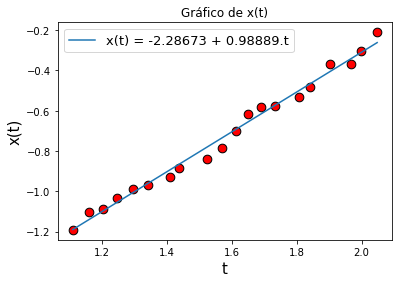

Número de iterações: 26510


In [11]:
plotLinear(ThetaXLinear, x_kick1, y_kick1, ['x(t)','t'])
print('Número de iterações:', iteracoesXLinear)

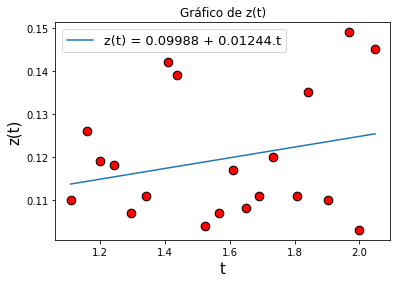

Número de iterações: 12013


In [12]:
plotLinear(ThetaZLinear, z_kick1, y_kick1, ['z(t)','t'])
print('Número de iterações:', iteracoesZLinear)

<p style="text-align: justify;">
&emsp; Pode-se ver que a regressão linear foi boa, e temos que o número de iterações para x(t) foi de 26510 e para z(t) foi de 12013. Este valor pode ser reduzido aumentando o valor de $\alpha$, se aumentado com destreza pode-se obter um resultado muito semelhante, mais a frente irei demonstrar melhor o impacto de $\alpha$ sobre as regressões.
</p>

<p style="text-align: justify;">
Agora vou plotar a trajetória da bola usando as funções paramétricas, vou plotar em duas perspectivas, de cima e de lado:
</p>

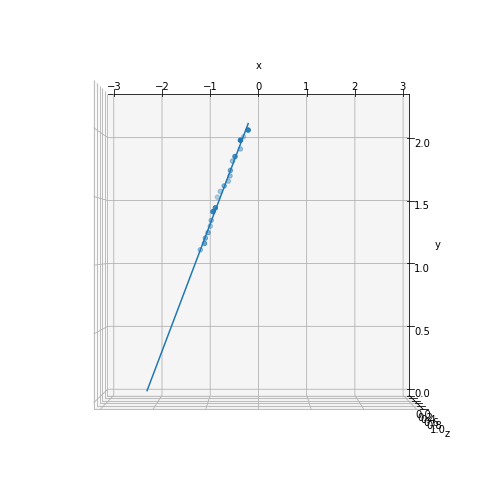

In [13]:
plotTrajetoria3DLinear(ThetaXLinear, ThetaZLinear, kick1, 'cima')

Agora vou plotar da perspectiva de lado:

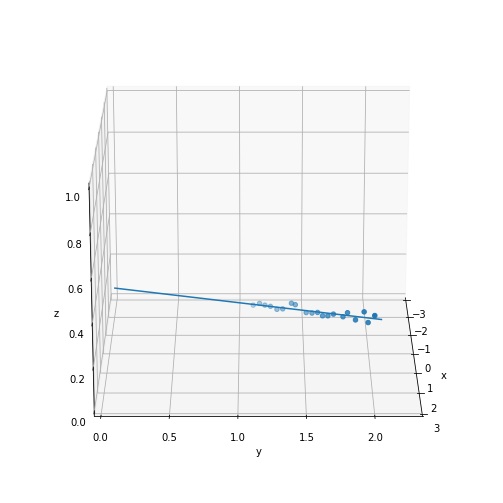

In [14]:
plotTrajetoria3DLinear(ThetaXLinear, ThetaZLinear, kick1, 'lado')

<p style="text-align: justify;">
&emsp; Note que a trajetória para a regressão linear ficou boa, e se basearmos nessa regressão pode-se dizer que tivemos um chute rasteiro em direção ao canto do gol, partindo aproximadamente de y ~ 2.2 em direção a y = 0:
</p>

<p style="text-align: justify;">
&emsp; Agora vou repitir todo esse processo para regressão polinomial de ordem 2. A leitura dos dados já foi feita na etapa anterior e lembre-se utilizarei a prametrização:
                                         $$\left\{\begin{matrix}
                                        y(t) &=  &t \\ 
                                        x(t) &= &a &+ &b \cdot t&+&c \cdot t^2\\ 
                                        z(t) &= &d &+ &e \cdot t&+&f \cdot t^2\\ 
                                        \end{matrix}\right.
                                        $$
</p>

<p style="text-align: justify;">
&emsp; Da mesma forma que fiz na regressão linear, vou definir $\theta$ inicial como $\theta_0 = 0$ , $\theta_1  = 0$ e $\theta_2  = 0$ e fazer a regressão polinomial de grau 2 para $x(t)$ e $z(t)$, considerando $y(t) = t$. Além disso vou escolher a taxa de aprendizado como $\alpha = 0.01$.
</p>

In [15]:
alfa = 0.01

ThetaInicial = [0,0,0]
ThetaXPoli, iteracoesXPoli = gradienteDescendentePolinomial(ThetaInicial, x_kick1, y_kick1, alfa)

ThetaInicial = [0,0,0]
ThetaZPoli, iteracoesZPoli = gradienteDescendentePolinomial(ThetaInicial, z_kick1, y_kick1, alfa)

<p style="text-align: justify;">
&emsp; Vou plotar $x(t)$ e $z(t)$ e o número de iterações para ver como ficou:
</p>

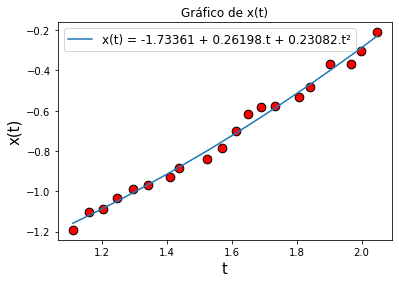

Número de iterações: 299193


In [16]:
plotPolinomial(ThetaXPoli,x_kick1, y_kick1, ['x(t)','t'])
print('Número de iterações:', iteracoesXPoli)

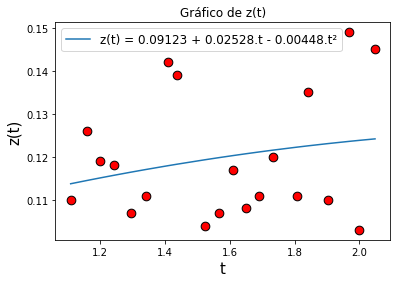

Número de iterações: 23832


In [17]:
plotPolinomial(ThetaZPoli,z_kick1, y_kick1, ['z(t)','t'])
print('Número de iterações:', iteracoesZPoli)

<p style="text-align: justify;">
&emsp; Pode-se ver que a regressão polinomial de segundo grau foi boa, e temos que o número de iterações para x(t) foi de 299193 e para z(t) foi de 23832. Percebe-se que o número de iterações para x(t) foi grande, e pode ser reduzido aumentando o valor de $\alpha$, isso será analisado mais a frente.
</p>

<p style="text-align: justify;">
&emsp; Agora vou plotar a trajetória da bola usando as funções paramétricas, da mesma forma que fiz na regressão linea, vou plotar em duas perspectivas, de cima e de lado:
</p>

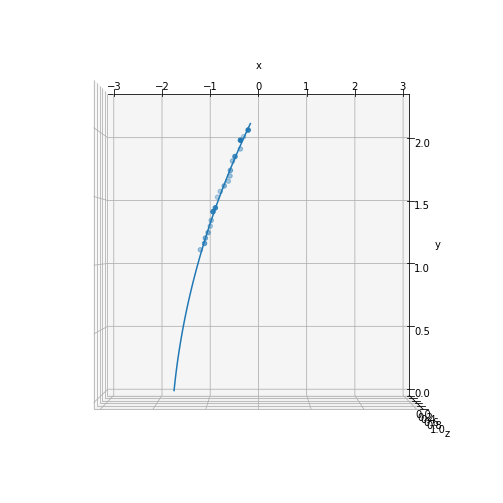

In [18]:
plotTrajetoria3DPolinomial(ThetaXPoli, ThetaZPoli, kick1, 'cima')

Agora vou plotar da perspectiva de lado:

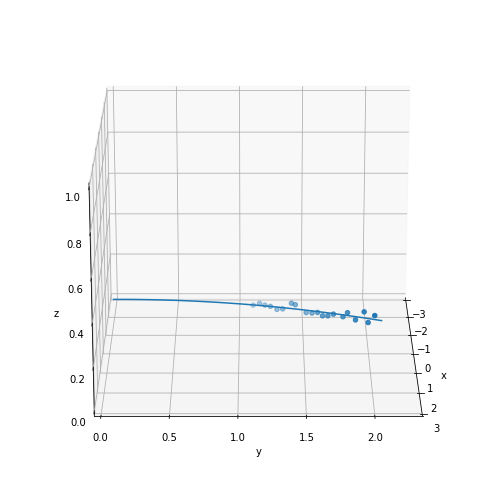

In [19]:
plotTrajetoria3DPolinomial(ThetaXPoli, ThetaZPoli, kick1, 'lado')

<p style="text-align: justify;">
&emsp; Note que a trajetória para a regressão polinomial de segundo grau também ficou boa, e se basearmos nessa regressão pode-se dizer que tivemos um chute rasteiro com um leve efeito em direção ao canto do gol, partindo aproximadamente de y ~ 2.1 em direção a y = 0:
</p>

<p style="text-align: justify;">
&emsp; Agora vou usar o MSE que implementei pra ver qual dos dois modelos tem menor erro, e verificar qual impacto da regressão linear ou polinomial sobre esse conjunto de dados.<br>
&emsp; Mas note, como fiz regressões para as paramétricas $x(t)$ e $z(t)$ então vou fazer o MSE para cada paramétrica e fazer a média, assim poderei comparar o erro médio entre a regressão linear e polinomial para esse dataset.

In [20]:
xLinear = f(ThetaXLinear, y_kick1, 1)
zLinear = f(ThetaZLinear, y_kick1, 1)

xMSELinear = MSE(xLinear, x_kick1)
zMSELinear = MSE(zLinear, z_kick1)

MSELinearMedio = (xMSELinear+zMSELinear)/2

print('MSE médio para regressão linear:', MSELinearMedio)

MSE médio para regressão linear: 0.0005591848092928865


In [21]:
xPoli = f(ThetaXPoli, y_kick1, 2)
zPoli = f(ThetaZPoli, y_kick1, 2)

xMSEPoli = MSE(xPoli, x_kick1)
zMSEPoli = MSE(zPoli, z_kick1)

MSEPoliMedio = (xMSEPoli+zMSEPoli)/2
print('MSE médio para regressão polinomial de segundo grau:', MSEPoliMedio)

MSE médio para regressão polinomial de segundo grau: 0.00047734819335856776


<p style="text-align: justify;">
&emsp; Observando os MSE médios percebe-se que ambos os modelos foram bem aplicados para esse dataset, pois os valores de MSE foram consideravelmente pequenos. Mesmo que a diferença entre o MSE médio linear e polinomial tenha sido muito pequena, menor que $10^{-4}$, foi com a regressão polinomial de segunda ordem que obteve-se um MSE médio menor, assim forma pode-se dizer que esse foi o melhor modelo para o dataset kick1.

#### 2.2 Dataset kick2
<p style="text-align: justify;">
&emsp; Farei para o dataset kick2, tudo o que foi feito para o dataset kick1, começarei fazendo a leitura dos dados:
</p>

In [22]:
kick2 = Dados('kick2.dat')

<p style="text-align: justify;">
&emsp; Da mesmo forma que fiz para o dataset kick1, vou fazer as regressões linear e polinomial considerando retas e curvas paramétricas, vou iniciar fazendo a regressão linear:<br>
&emsp;Lembre-se aqui utilizarei a parametrização:
                                            $$\left\{\begin{matrix}
                                        y(t) &=  &t \\ 
                                        x(t) &= &a &+ &b \cdot t\\ 
                                        z(t) &= &c &+ &d \cdot t
                                        \end{matrix}\right.
                                        $$
&emsp; Note que $y(t)$ , $x(t)$ e $z(t)$ fazem referencias as colunas do dataset, aqui vou atribuir essas colunas as listas x_kick2, y_kick2 e z_kick2:  
</p>

In [23]:
x_kick2 = kick2[:,0]
y_kick2 = kick2[:,1]
z_kick2 = kick2[:,2]

<p style="text-align: justify;">
&emsp; Ainda vou definir $\theta$ inicial como $\theta_0 = 0$ e $\theta_1  = 0$ e fazer a regressão linear para $x(t)$ e $z(t)$, considerando $y(t) = t$. Além disso vou escolher a taxa de aprendizado como $\alpha = 0.01$.
</p>

In [24]:
alfa = 0.01

ThetaInicial = [0,0]
ThetaXLinear_2, iteracoesXLinear_2 = gradienteDescendenteLinear(ThetaInicial, x_kick2, y_kick2, alfa)

ThetaInicial = [0,0]
ThetaZLinear_2, iteracoesZLinear_2 = gradienteDescendenteLinear(ThetaInicial, z_kick2, y_kick2, alfa)

<p style="text-align: justify;">
&emsp; Vou plotar $x(t)$ e $z(t)$ e o número de iterações para ver como ficou:
</p>

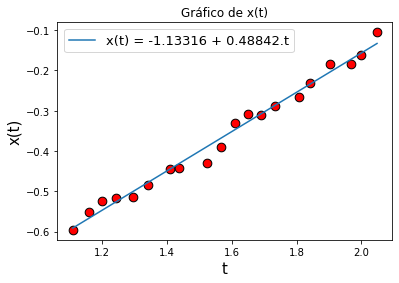

Número de iterações: 23512


In [25]:
plotLinear(ThetaXLinear_2, x_kick2, y_kick2, ['x(t)','t'])
print('Número de iterações:', iteracoesXLinear_2)

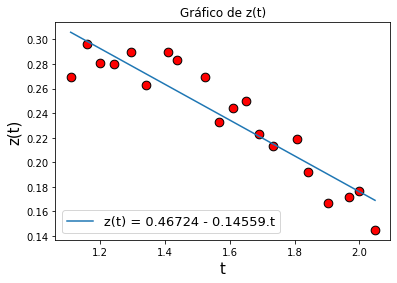

Número de iterações: 19492


In [26]:
plotLinear(ThetaZLinear_2, z_kick2, y_kick2, ['z(t)','t'])
print('Número de iterações:', iteracoesZLinear_2)

<p style="text-align: justify;">
&emsp; Pode-se ver que a regressão linear foi boa, e temos que o número de iterações para x(t) foi de 23512 e para z(t) foi de 19492. Este valor pode ser reduzido aumentando o valor de $\alpha$, mais a frente irei demonstrar melhor o impacto de $\alpha$ sobre as regressões.
</p>

<p style="text-align: justify;">
Agora vou plotar a trajetória da bola usando as funções paramétricas, vou plotar em duas perspectivas, de cima e de lado:
</p>

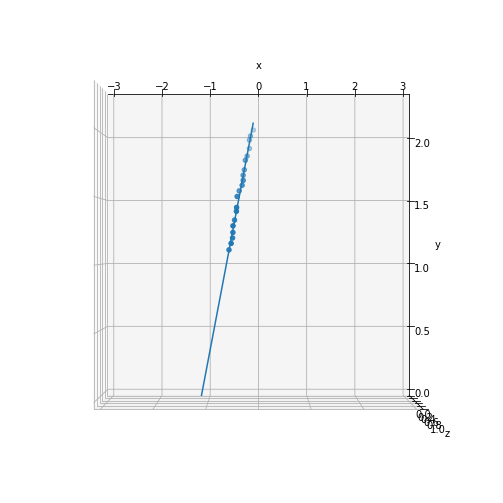

In [27]:
plotTrajetoria3DLinear(ThetaXLinear_2, ThetaZLinear_2, kick2, 'cima')

Agora vendo de lado:

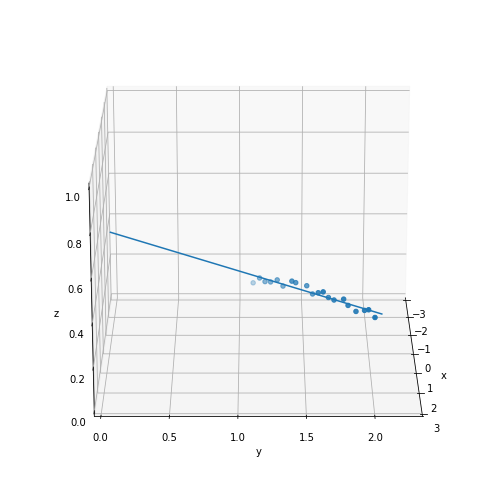

In [28]:
plotTrajetoria3DLinear(ThetaXLinear_2, ThetaZLinear_2, kick2, 'lado')

<p style="text-align: justify;">
&emsp; A trajetória para a regressão linear ficou boa, e se basearmos nessa regressão pode-se dizer que esse chute foi um lançamento em direção ao canto do gol, partindo aproximadamente de y ~ 2.2 em direção a y = 0:
</p>

<p style="text-align: justify;">
&emsp; Agora vou repitir todo esse processo para regressão polinomial de ordem 2. A leitura dos dados já foi feita na etapa anterior e lembre-se utilizarei a prametrização:
                                         $$\left\{\begin{matrix}
                                        y(t) &=  &t \\ 
                                        x(t) &= &a &+ &b \cdot t&+&c \cdot t^2\\ 
                                        z(t) &= &d &+ &e \cdot t&+&f \cdot t^2\\ 
                                        \end{matrix}\right.
                                        $$
</p>

<p style="text-align: justify;">
&emsp; Da mesma forma que fiz na regressão linear, vou definir $\theta$ inicial como $\theta_0 = 0$ , $\theta_1  = 0$ e $\theta_2  = 0$ e fazer a regressão polinomial de grau 2 para $x(t)$ e $z(t)$, considerando $y(t) = t$. Além disso vou escolher a taxa de aprendizado como $\alpha = 0.01$.
</p>

In [29]:
alfa = 0.01

ThetaInicial = [0,0,0]
ThetaXPoli_2, iteracoesXPoli_2 = gradienteDescendentePolinomial(ThetaInicial, x_kick2, y_kick2, alfa)

ThetaInicial = [0,0,0]
ThetaZPoli_2, iteracoesZPoli_2 = gradienteDescendentePolinomial(ThetaInicial, z_kick2, y_kick2, alfa)

<p style="text-align: justify;">
&emsp; Vou plotar $x(t)$ e $z(t)$ e o número de iterações para ver como ficou:
</p>

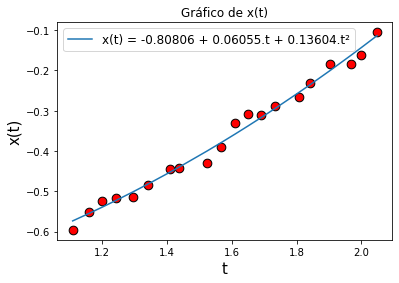

Número de iterações: 192397


In [30]:
plotPolinomial(ThetaXPoli_2,x_kick2, y_kick2, ['x(t)','t'])
print('Número de iterações:', iteracoesXPoli_2)

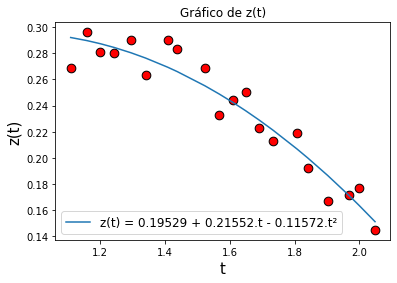

Número de iterações: 50849


In [31]:
plotPolinomial(ThetaZPoli_2,z_kick2, y_kick2, ['z(t)','t'])
print('Número de iterações:', iteracoesZPoli_2)

<p style="text-align: justify;">
&emsp; Pode-se ver que a regressão polinomial de segundo grau foi boa, e temos que o número de iterações para x(t) foi de 192397 e para z(t) foi de 50849. Percebe-se que o número de iterações para x(t) foi grande, e pode ser reduzido aumentando o valor de $\alpha$, isso será analisado mais a frente.
</p>

<p style="text-align: justify;">
&emsp; Agora vou plotar a trajetória da bola usando as funções paramétricas, da mesma forma que fiz na regressão linea, vou plotar em duas perspectivas, de cima e de lado:
</p>

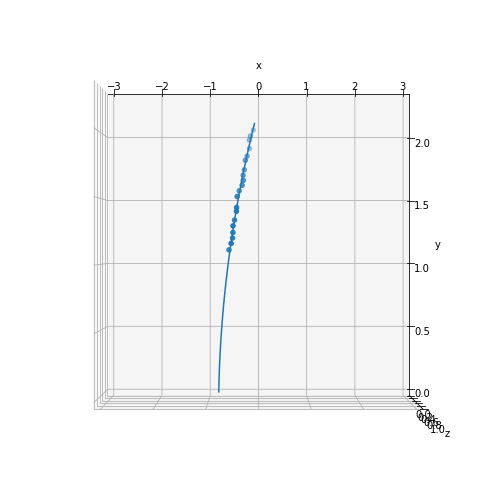

In [32]:
plotTrajetoria3DPolinomial(ThetaXPoli_2, ThetaZPoli_2, kick2, 'cima')

Agora vou plotar da perspectiva de lado:

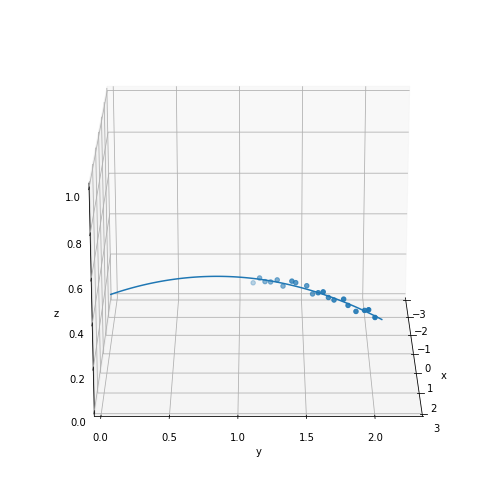

In [33]:
plotTrajetoria3DPolinomial(ThetaXPoli_2, ThetaZPoli_2, kick2, 'lado')

<p style="text-align: justify;">
&emsp; Note que a trajetória para a regressão polinomial de segundo grau também ficou boa, e se basearmos nessa regressão pode-se dizer que esse chute foi um lançamento com um leve efeito em direção ao canto do gol, partindo aproximadamente de y ~ 2.2 em direção a y = 0:
</p>

<p style="text-align: justify;">
&emsp; Igual fiz para o kick1, vou usar o MSE que implementei pra ver qual dos dois modelos tem menor erro, e verificar qual impacto da regressão linear ou polinomial sobre esse conjunto de dados.<br>
&emsp; Lembre-se que, como fiz regressões para as paramétricas $x(t)$ e $z(t)$ então vou fazer o MSE para cada paramétrica e fazer a média, assim poderei comparar o erro médio entre a regressão linear e polinomial para esse dataset.

In [34]:
xLinear_2 = f(ThetaXLinear_2, y_kick2, 1)
zLinear_2 = f(ThetaZLinear_2, y_kick2, 1)

xMSELinear_2 = MSE(xLinear_2, x_kick2)
zMSELinear_2 = MSE(zLinear_2, z_kick2)

MSELinearMedio_2 = (xMSELinear_2+zMSELinear_2)/2

print('MSE médio para regressão linear:', MSELinearMedio_2)

MSE médio para regressão linear: 0.00028704425201840677


In [35]:
xPoli_2 = f(ThetaXPoli_2, y_kick2, 2)
zPoli_2 = f(ThetaZPoli_2, y_kick2, 2)

xMSEPoli_2 = MSE(xPoli_2, x_kick2)
zMSEPoli_2 = MSE(zPoli_2, z_kick2)

MSEPoliMedio_2 = (xMSEPoli_2+zMSEPoli_2)/2
print('MSE médio para regressão polinomial de segundo grau:', MSEPoliMedio_2)

MSE médio para regressão polinomial de segundo grau: 0.00020583204340428313


<p style="text-align: justify;">
&emsp; Observando os MSE médios percebe-se que ambos os modelos foram bem aplicados para esse dataset, pois os valores de MSE foram consideravelmente pequenos. Mesmo que a diferença entre o MSE médio linear e polinomial tenha sido muito pequena, menor que $10^{-4}$, foi com a regressão polinomial de segunda ordem que obteve-se um MSE médio menor, assim forma pode-se dizer que esse foi o melhor modelo para o dataset kick2.

### 3. Impacto do valor de alfa
<p style="text-align: justify;">
&emsp; No tópico anterior fizemos a analise de qual regressão era mais apropriada para cada, ou seja, verifiquei como a complexidade do modelo influenciava no erro MSE associado.<br>
&emsp; Agora nesse tópico irei analisar o impacto da taxa de aprendizagem $\alpha$ sobre as regressões, vou demonstrar esse impacto no dataset kick2 e para regressão linear.<br>   

Leitura dos dados:

In [36]:
kick2 = Dados('kick2.dat')

<p style="text-align: justify;">
&emsp;Vou fazer a regressão linear seguindo aquele mesma ideia das parametrizações, mas agora vou alterar o valor de alfa 3 vezes, e assim poderemos ver o que acontece com o número de iterações e com o fit da reta.
</p>

<p style="text-align: justify;">
&emsp; Para fazer a analise eu usei $\alpha$ = 0.01, e descobri que para $x(t)$ e $z(t)$ o número de iterações foi de 23512 e 19492, respectivamente, além de ressaltar que os fits convergiram com equações $x(t) = -1.13316 + 0.48842.t$, e $z(t) = 0.46724 - 0.14559.t$, com erro MSE médio entre $x(t)$ e $z(t)$ de 0.000287044.

&emsp; Agora que relembramos o resultado para $\alpha$ = 0.01, vamos testar novos valores de alfa e ver as principais diferenças:

Vamos começar com um valor pequeno de alfa 100 vezes menor, $\alpha = 0.0001$


In [37]:
alfa = 0.0001

ThetaInicial = [0,0]
ThetaXLinear_2_alfa1, iteracoesXLinear_2_alfa1 = gradienteDescendenteLinear(ThetaInicial, x_kick2, y_kick2, alfa)

ThetaInicial = [0,0]
ThetaZLinear_2_alfa1, iteracoesZLinear_2_alfa1 = gradienteDescendenteLinear(ThetaInicial, z_kick2, y_kick2, alfa)

O resultado demorou alguns minutos para sair, vamos ver como ficou os valores de Theta e os números de iterações:

In [38]:
print('Theta para x(t):', ThetaXLinear_2_alfa1)
print('Iterações:', iteracoesXLinear_2_alfa1)
print()
print('Theta para z(t):', ThetaZLinear_2_alfa1)
print('Iterações:', iteracoesZLinear_2_alfa1)

Theta para x(t): [-1.1331587044765004, 0.4884144889778394]
Iterações: 2351350

Theta para z(t): [0.46723750372269757, -0.14558557917345336]
Iterações: 1949273


<p style="text-align: justify;">
&emsp; Inicialmente pode-se notar que x(t) e z(t) convergiram, pois a regressão retornou praticamente os mesmos valores de $\theta$ obtidos com $\alpha$ = 0.01, ou seja, as equações achadas são as mesmas. <br>
&emsp; Uma diferença muito grande que se obteve agora foi o número de iterações, com $\alpha = 0.01$ foram feitas, para $x(t)$ e $z(t)$, 23512 e 19492 iterações, mas agora com $\alpha = 0.0001$ foram feitas 2351350 e 1949273 iterações, assim pode-se confirmar que alfa é inversamente proporcional ao número de iterações, já que ao dimiuir $\alpha$ em 100 vezes o número de iterações aumentou, também, em 100 vezes.

Agora vou considerar o valor de alfa 10 vezes maior, em relação a $\alpha = 0.01$, ou seja utilizarei $\alpha = 0.1$


In [39]:
alfa = 0.1

ThetaInicial = [0,0]
ThetaXLinear_2_alfa2, iteracoesXLinear_2_alfa2 = gradienteDescendenteLinear(ThetaInicial, x_kick2, y_kick2, alfa)

ThetaInicial = [0,0]
ThetaZLinear_2_alfa2, iteracoesZLinear_2_alfa2 = gradienteDescendenteLinear(ThetaInicial, z_kick2, y_kick2, alfa)

O resultado demorou alguns minutos para sair, vamos ver como ficou os valores de Theta e os números de iterações:

In [40]:
print('Theta para x(t):', ThetaXLinear_2_alfa2)
print('Iterações:', iteracoesXLinear_2_alfa2)
print()
print('Theta para z(t):', ThetaZLinear_2_alfa2)
print('Iterações:', iteracoesZLinear_2_alfa2)

Theta para x(t): [-1.133172656379249, 0.4884231312581275]
Iterações: 2350

Theta para z(t): [0.4672475367286823, -0.1455917939565849]
Iterações: 1948


<p style="text-align: justify;">
&emsp; Inicialmente pode-se notar que x(t) e z(t) convergiram, aqui tivemos uma variação $ < 10^{-5}$ em relação ao valores de $\theta$ obtidos com $\alpha$ = 0.01, porém essa diferença é muito pequena e as equações de x(t) e z(t) se mantiveram para os dois valores de alfa.<br>
&emsp; Quanto ao número de iterações, como para $\alpha = 0.01$ foram feitas, 23512 e 19492 iterações, era esperado que para $\alpha = 0.1$ fossem feitas 10 vezes menos iterações, o que aconteceu, já que obteve-se 2350 e 1948 iterações, para x(t) e z(t). Isso nos confirma, novamente, que alfa é inversamente proporcional ao número de iterações, já que ao aumentar $\alpha$ em 10 vezes o número de iterações diminuiu, também, em 10 vezes.

Agora vou considerar $\alpha = 1$.


In [41]:
alfa = 1

ThetaInicial = [0,0]
ThetaXLinear_2_alfa3, iteracoesXLinear_2_alfa3 = gradienteDescendenteLinear(ThetaInicial, x_kick2, y_kick2, alfa)

ThetaInicial = [0,0]
ThetaZLinear_2_alfa3, iteracoesZLinear_2_alfa3 = gradienteDescendenteLinear(ThetaInicial, z_kick2, y_kick2, alfa)

Vamos ver os valores de Theta e os números de iterações:

In [42]:
print('Theta para x(t):', ThetaXLinear_2_alfa3)
print('Iterações:', iteracoesXLinear_2_alfa3)
print()
print('Theta para z(t):', ThetaZLinear_2_alfa3)
print('Iterações:', iteracoesZLinear_2_alfa3)

Theta para x(t): Diverge
Iterações: 78

Theta para z(t): Diverge
Iterações: 77


<p style="text-align: justify;">
&emsp; Pode-se ver que x(t) e z(t) divergem, no meu código isso acontece quando algum valor de theta é maior que $2^{100}$, ou seja, os valores de Theta estavam crescendo muito.<br> 
</p>

<p style="text-align: justify;">
&emsp; Resumindo o que vimos agora, temos que uma taxa de aprendizado muito baixa torna o aprendizado muito lento, ou seja, é mais caro computacionalmente. Já uma taxa de aprendizado muito alta provoca oscilações no treinamento e impede a convergência do processo de aprendizado.<br>
</p>
    

### 4. Analise dos chutes

<p style="text-align: justify;">
&emsp; Nesse tópico irei utilizar as regressões que obtiveram menor erro em cada dataset para avaliar se é possivel que o goleiro defenda os chutes feitos.
</p>

#### 4.1 Dataset kick1
<p style="text-align: justify;">
&emsp; Nesse dataset o melhor modelo foi a polinomial de segundo grau, vamos relembrar quais foram as equações paramétricas obtidas e a trajetória: <br>
&emsp; As paramétricas foram:
                                    $$\left\{\begin{matrix}
                                        y(t) &=  &t \\ 
                                        x(t) &=& -1.73361 &+ &0.26198 \cdot t&+&0.23082 \cdot t^2\\ 
                                        z(t) &= &0.09123 &+ &0.02528 \cdot t&-&0.00448 \cdot t^2\\ 
                                        \end{matrix}\right.
                                        $$
</p>

<p style="text-align: justify;">
&emsp; Plotando a trajetória da bola com ambas perspectivas temos que:

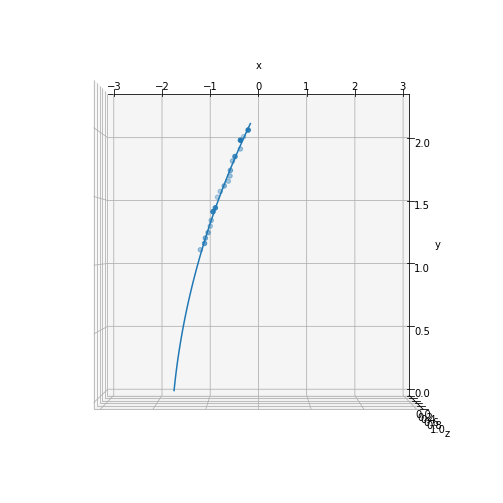

In [43]:
plotTrajetoria3DPolinomial(ThetaXPoli, ThetaZPoli, kick1, 'cima')

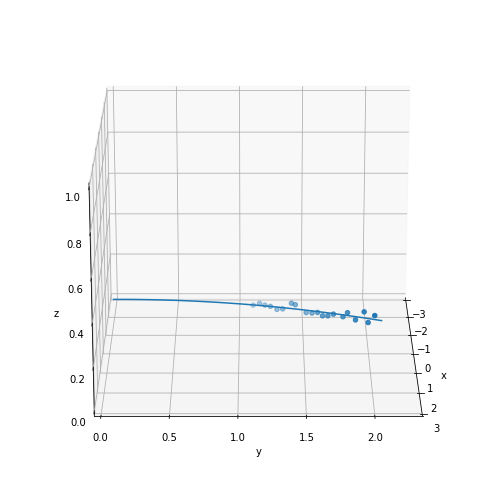

In [44]:
plotTrajetoria3DPolinomial(ThetaXPoli, ThetaZPoli, kick1, 'lado')

<p style="text-align: justify;">
&emsp; Note que se nos basearmos no tamanho padrão de um gol da FIFA (o travessão fica a 2,44 m de altura e o gol tem 7,32 m de largura), é possivel notar que a bola foi chutada na direção correta, ou seja, o jogador não errou o chute. Observando ainda o plot é possivel notar que o chute foi rasteiro e com certo efeito, já que a bola fez uma curva. <br>
&emsp; O chute ter sido rasteiro e não ter sido tão em direção do canto do gol aumenta as chances do goleiro pegar a bola, porém para ter certeza preciso calcular a velocidade da bola para saber o quão forte foi esse chute. <br>
&emsp; Para calcular a velocidade vou precisar utilizar as curvas paramétricas que descobri, mas note, nelas o parametro t, apesar desse nome, não é o tempo. Como y(t) = t,  t e y tem uma relação 1:1, para obter a velocidade vou calcular a distancia percorrida pela bola na trajetória parabolica, considerando y(t) dentro do intervalo do dataset [1.109, 2.048], e então vou dividir essa distancia pelo tempo que a bola demorou para percorre-la. Para o tempo, vou considerar o fato dos dados terem sidos capturados a 60 frames/segundo, como foram obtidos 20 pontos a 60 frames/segundo, a bola percorreu o intervalo [1.109, 2.048] em um total de 1/3 de segundo.<br>
&emsp; Para calcular a distancia percorrida na trajetória parabolica, preciso considerar que o comprimento de um trecho de uma parabola, no plano 3D, é:
    $$C = \int_{a}^{b}{\sqrt{dx^2 + dy^2 + dz^2}}$$
&emsp; Considerando que o intervalo [a,b] da integral é [1.109, 2.048] e levando em conta x(t), y(t) e z(t) da parametrização obtenho que a distância percorrida pela bola durante a captura dos pontos foi de C = 1.32 metros, assim, a velocidade da bola no instante após a finalização da captura dos pontos, foi de:
    $$ V = \frac{1.32}{1/3} = 3.96 m/s $$
&emsp; Ou seja, no momento em que o último ponto foi capturado a bola estava a 3.96 m/s. <br> 
&emsp; Agora vamos descobrir quanto a bola demorou para chegar no gol a partir do momento em que o último ponto foi capturado, para isso devemos considerar, no calculo da distância , a mesma integral, mas agora com intervalo de [0, 1.109], fazendo os calculos obtém-se C = 1.26m, que a uma velocidade de 3.96 m/s seria percorrido em 0.318 segundos. <br>
&emsp; Para finalizar, considerando que o goleiro estava em (0,0,0) e a bola chegou na posição (-1.734, 0, 0.09123), o goleiro teve 0.318 segundos para pegar uma bola pegar uma bola que estava vindo rasteira a 1.74 metros da sua posição, a melhor maneira para pegar essa bola seria se jogando no chão em direção a ela, mas considerando o pequeno tempo que o goleiro tinha, não acho que o goleiro consiga defender essa bola.

#### 4.2 Dataset kick2
<p style="text-align: justify;">
&emsp; Nesse dataset o melhor modelo também foi a polinomial de segundo grau, vamos relembrar quais foram as equações paramétricas obtidas e a trajetória: <br>
&emsp; As paramétricas foram:
                                    $$\left\{\begin{matrix}
                                        y(t) &=  &t \\ 
                                        x(t) &=& -0.80806 &+ &0.06055 \cdot t&+&0.13604 \cdot t^2\\ 
                                        z(t) &= &0.19529 &+ &0.21552 \cdot t&-&0.11572 \cdot t^2\\ 
                                        \end{matrix}\right.
                                        $$
</p>

<p style="text-align: justify;">
&emsp; Plotando a trajetória da bola com ambas perspectivas temos que:

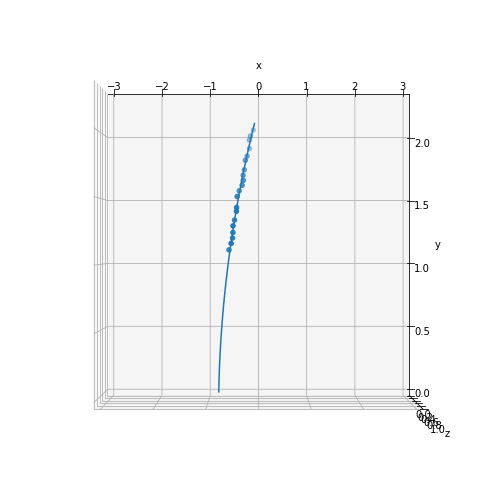

In [49]:
plotTrajetoria3DPolinomial(ThetaXPoli_2, ThetaZPoli_2, kick2, 'cima')

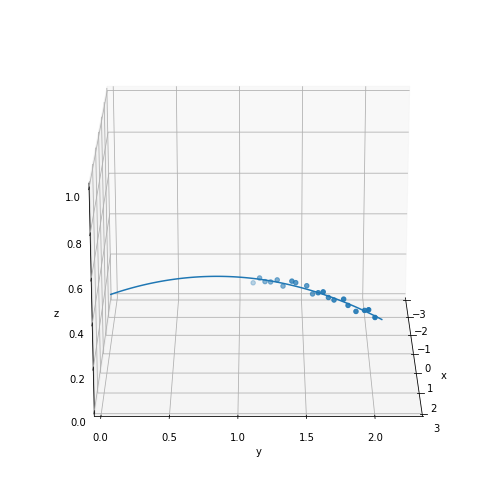

In [46]:
plotTrajetoria3DPolinomial(ThetaXPoli_2, ThetaZPoli_2, kick2, 'lado')

<p style="text-align: justify;">
&emsp; Ainda baseando-se no tamanho padrão de um gol da FIFA, é possivel notar que a bola foi chutada na direção correta, ou seja, o jogador não errou o chute. Observando ainda o plot, é possivel notar que o chute foi um lançamento e com um certo efeito, já que a bola fez uma curva para o lado. <br>
&emsp; Farei as análises de distâncias e velocidades da mesma forma que fiz para kick1. Primeiro vou calcular a distância percorrida durante a captura dos pontos, no intervalo [1.109, 2.048]:
    $$C = \int_{1.109}^{2.048}{\sqrt{dx^2 + dy^2 + dz^2}} = 1.06$$
&emsp; Agora vou calcular a velocidade da bola no final da captura dos pontos:
    $$ V = \frac{1.06}{1/3} = 3.18 m/s $$
&emsp; Ou seja, no momento em que o último ponto foi capturado a bola estava a 3.18 m/s. <br> 
&emsp; Agora vamos descobrir quanto a bola demorou para chegar no gol a partir do momento em que o último ponto foi capturado, para isso basta fazer a integral do trecho restante de intervalo [0, 1.109]: <br>
    $$C = \int_{0}^{1.109}{\sqrt{dx^2 + dy^2 + dz^2}} = 1.14$$
&emsp; Calculando o tempo para bola chegar, desde o fim da captura dos pontos, até o gol obtém-se 1.14/3.18 = 0.36 segundos. <br>
&emsp; Para finalizar, considerando que o goleiro estava em (0,0,0) e a bola chegou na posição (-0.808, 0, 0.19529), o goleiro teve 0.36 segundos para pegar uma bola pegar uma bola que estava vindo pelo ar a 0.83 metros da sua posição, a melhor maneira para pegar essa bola seria levando os braços no ar em direção a bola. Assim, considerando que a bola estava relativamente perto, caso o goleiro estivesse bem posicionado e atento, acho que com 0.36 segundos o goleiro conseguiria levar os braços em direção a bola e apanha-la.

# Parte 2:
<p style="text-align: justify;">
&emsp; Para a segunda parte do projeto eu vou resolver um problema de classificação, usando métodos de aprendizado supervisionado, em um dataset de imagens de números de 0 a 9 escritos a mão. Meu objetivo será treinar os métodos, utilizando um conjunto de treinamento, e depois verificar, com o conjunto de testes, se o meu modelo foi bom o suficiente para predizer os digitos.<br>
</p>

### 1. Preparação
<p style="text-align: justify;">
&emsp; Nesse tópico irei carregar o dataset dos dígitos e fazer o split entre treinamento e teste, utilizando o sklearn. Em seguida aplicarei o feature scaling e usarei a ferramenta t-SNE para fazer a visualização dos dados.

#### 1.1 Preparando dataset
<p style="text-align: justify;">
&emsp; Para carregar o dataset irei utilizar a biblioteca sklearn e em seguida, utilizando essa mesma biblioteca, farei o split do dataset em um conjunto de treinamente e um conjunto de testes, confira abaixo.
</p>

In [2]:
import numpy as np
from sklearn.datasets import load_digits

x, y = load_digits(return_X_y=True)

Agora vou fazer o split do dataset, considerando que o conjunto de teste tem 10% dos dados do dataset:

In [3]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.1, random_state=0)

#### 1.2 Feature scaling
<p style="text-align: justify;">
&emsp; A normalização dos dados, mesmo que as vezes não seja necessária, pode nos ajudar a melhorar a performance do algoritmo, bem como pode nos ajudar a comparar e interpretar diferentes pesos. Sabendo disso vou aplicar o feature scaling usando o sklearn, note que vou aplica-lo tanto para x_treino, quanto para x_teste, já que ambos conjuntos devem seguir o mesmo padrão.
</p>

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.transform(x_teste)

#### 1.3 Visualização dos dados
<p style="text-align: justify;">
&emsp; Como o dataset dos digitos tem 64 features, já que ele possui imagens 8x8, então para visualizar os dados vou precisar usar alguma ferramenta, que consegue diminuir as dimensionalidades do problema e mostrar claramente como os dados estão distribuidos, no meu caso usarei o t-SNE. Como o conjunto de teste é considerado desconhecido, então aplicarei o t-SNE apenas para o conjunto de treino:
</p>

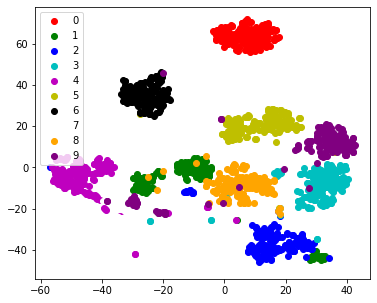

In [5]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

tsne = TSNE(n_components=2, random_state=0)

x_treino_2d = tsne.fit_transform(x_treino)

target_ids = range(len(load_digits().target_names))

plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, load_digits().target_names):
    plt.scatter(x_treino_2d[y_treino == i, 0], x_treino_2d[y_treino == i, 1], c=c, label=label)
plt.legend()
plt.show()

<p style="text-align: justify;">
&emsp; Acima, pode-se ver que, apesar de alguns pontos sobreporem classes erradas, as classes de digitos foram bem representadas e o t-SNE fez um bom trabalho. Ainda desse gráfico é possível notar que as classes estão bem distribuidas e o nosso problema seria bem resolvido por métodos de aprendizado supervisionado.
</p>

<p style="text-align: justify;">
&emsp; Agora vou aplicar os métodos de aprendizado supervisionado que eu escolhi, começarei aplicando o método da regressão logística.
</p>

### 2. Regressão Logística
<p style="text-align: justify;">
&emsp; O método da regressão logística, em poucas palavras, é um método estatístico que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por variáveis categóricas. Assim, esse é um bom método para o nosso caso, isso é, ele é bom para fazer a predição de dígitos escritos a mão. <br>

&emsp; No sklear isso já está implementado, e posso executa-lo e fazer o fit rapidamente, confira abaixo:
</p>

In [6]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)
fit = model_1.fit(x_treino, y_treino)

<p style="text-align: justify;">
Mas será que esse modelo está bom? <br>
&emsp; A resposta é depende, no caso vai depender do erro e da qualidade tolerada que o programador está buscando, no meu caso, estou buscando o melhor modelo que posso achar, então a resposta, para o meu caso, é não, esse modelo ainda não está adequado. <br>
E como posso melhora-lo? <br>
&emsp; Para melhorar o modelo posso fazer uma validação cruzada, mais precisamente um k-fold, então esqueça esse modelo e vamos achar um melhor!

#### 2.1 Validação cruzada

<p style="text-align: justify;">
&emsp; Para validação cruzada irei usar o stratified k-fold, para explicar ele vou primeiro explicar o k-fold.<br>
&emsp; No K-Fold, normalmente divide-se entre k grupos o conjunto de treinamente, em seguida se escolhe, de maneira aleatória, um dos grupos para ser o grupo de validação. O restante dos grupos se juntam, para treinar seu modelo, e em seguida predizer o grupo de validação e ver qual foi a acuracia. Esse método se repete até que todos os grupos tenham passado no grupo de validação. <br>
&emsp; Dividir os dados aleatóriamente pode causar uma representação incorreta da classe, ou seja, pode haver uma proporção incorreta na representação das classes no conjunto de treinamento e validação, o que pode levar ao modelo apresentar um overfitting ou underfitting. Para evitar isso as divisões de validação e treinamento devem ter as mesmas proporções das classes alvo, e assim que nasce o Stratified KFold, que é um k-fold que estabelece essa proporção correta das classes alvo na divisão dos conjuntos de validação e treinamento .<br> 
</p>
<p style="text-align: justify;">
&emsp; Assim, vou utilizar o Stratified KFold do sklearn. Para cada split do kfold irei achar um modelo utilizando o novo conjunto de treinamento que o kfold forneceu, depois irei avaliar a acuracia desse modelo usando o conjunto de validação. Para finalizar, irei definir como melhor modelo aquele que obteve maior acurácia para classificar o conjunto de validação.
</p>

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=10)
maior_acuracia = 0
i = 1
for indice_treino, indice_validacao in skf.split(x_treino, y_treino):
    model_2 = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)

    x_treinoCV, x_validacao = x_treino[indice_treino], x_treino[indice_validacao]
    y_treinoCV, y_validacao = y_treino[indice_treino], y_treino[indice_validacao]
    
    model_2.fit(x_treinoCV, y_treinoCV)
    y_pred_validacao = model_2.predict(x_validacao)
    
    acuracia = accuracy_score(y_validacao,y_pred_validacao)
    print('Split',i,': Acurácia de', acuracia)
    
    if(acuracia > maior_acuracia):
        maior_acuracia = acuracia
        melhor_modelo = model_2
    i += 1


Split 1 : Acurácia de 0.9506172839506173
Split 2 : Acurácia de 0.9629629629629629
Split 3 : Acurácia de 0.9691358024691358
Split 4 : Acurácia de 0.9567901234567902
Split 5 : Acurácia de 0.9629629629629629
Split 6 : Acurácia de 0.9753086419753086
Split 7 : Acurácia de 0.9753086419753086
Split 8 : Acurácia de 0.9751552795031055
Split 9 : Acurácia de 0.9627329192546584
Split 10 : Acurácia de 0.968944099378882


<p style="text-align: justify;">
&emsp; Note que o algoritmo faz exatamente o que eu planejei, isso é, o Stratified KFold faz a separação do conjutno de treino entre conjunto de treinamento e de validação, para cada uma desses split eu treino o modelo, utilizando o conjunto de treinamento, e verifico a acurácia usando o conjunto de validação. No fim, o meu melhor modelo será aquele que tiver obtido maior acurácia quando usado o conjunto de validação, e este modelo estará salvo na variável melhor_modelo.
</p>